# Crop Yield Prediction using XGBoost

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

In [60]:
pesticides = pd.read_csv("pesticides.csv")
rainfall = pd.read_csv("rainfall.csv")
temperature = pd.read_csv("temp.csv")
yield_data = pd.read_csv("yield.csv")
yield_df = pd.read_csv("yield_df.csv")
pesticides.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [61]:
rainfall.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [62]:
temperature.head()

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [63]:
yield_data.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [64]:
yield_df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [65]:
print("pesticides shape: \n", pesticides.columns, pesticides.shape)
print("rainfall shape: \n", rainfall.columns, rainfall.shape)
print("temperature shape: \n", temperature.columns, temperature.shape)
print("yield shape: \n", yield_data.columns, yield_data.shape)
print("yield_df shape: \n", yield_df.columns, yield_df.shape)

pesticides shape: 
 Index(['Domain', 'Area', 'Element', 'Item', 'Year', 'Unit', 'Value'], dtype='object') (4349, 7)
rainfall shape: 
 Index([' Area', 'Year', 'average_rain_fall_mm_per_year'], dtype='object') (6727, 3)
temperature shape: 
 Index(['year', 'country', 'avg_temp'], dtype='object') (71311, 3)
yield shape: 
 Index(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code', 'Element',
       'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value'],
      dtype='object') (56717, 12)
yield_df shape: 
 Index(['Unnamed: 0', 'Area', 'Item', 'Year', 'hg/ha_yield',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'],
      dtype='object') (28242, 8)


In [66]:
print("Shape: ", yield_df.shape)
print("Columns: ", yield_df.columns)
print("Null values: ", yield_df.isna().sum())
print("Duplicate records: ", yield_df.duplicated().sum())
print(yield_df.info())

Shape:  (28242, 8)
Columns:  Index(['Unnamed: 0', 'Area', 'Item', 'Year', 'hg/ha_yield',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'],
      dtype='object')
Null values:  Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64
Duplicate records:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield  

In [67]:
yield_df.drop(columns=['Unnamed: 0'], inplace=True)

In [68]:
le_area =LabelEncoder()
yield_df['Area'] = le_area.fit_transform(yield_df['Area'])
le_item = LabelEncoder()
yield_df['Item'] = le_item.fit_transform(yield_df['Item'])

In [69]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,1,1990,36613,1485.0,121.0,16.37
1,0,3,1990,66667,1485.0,121.0,16.37
2,0,4,1990,23333,1485.0,121.0,16.37
3,0,5,1990,12500,1485.0,121.0,16.37
4,0,6,1990,7000,1485.0,121.0,16.37


In [70]:
yield_df['yield_class'] = pd.qcut(yield_df['hg/ha_yield'], q=3, labels=['Low','Medium','High'])

In [71]:
X = yield_df.drop(columns=['hg/ha_yield','yield_class'])
y = yield_df['yield_class']

In [72]:
X.head()

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,1,1990,1485.0,121.0,16.37
1,0,3,1990,1485.0,121.0,16.37
2,0,4,1990,1485.0,121.0,16.37
3,0,5,1990,1485.0,121.0,16.37
4,0,6,1990,1485.0,121.0,16.37


In [73]:
y.head()

0    Medium
1    Medium
2       Low
3       Low
4       Low
Name: yield_class, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [74]:
X.shape

(28242, 6)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [76]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(22593, 6) (5649, 6) (22593,) (5649,)


In [77]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


In [78]:
model = XGBClassifier(use_label_encoder = False, eval_metric='mlogloss')

In [79]:
model.fit(X_train,y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [80]:
y_pred = model.predict(X_test)

In [81]:
y_pred_labels = le.inverse_transform(y_pred)

In [82]:
y_pred_labels

array(['Low', 'High', 'Medium', ..., 'High', 'Medium', 'Medium'],
      dtype=object)

In [83]:
# Evaluate
print(classification_report(y_test, y_pred_labels))
print("Accuracy:", accuracy_score(y_test, y_pred_labels))

              precision    recall  f1-score   support

        High       0.98      0.98      0.98      1883
         Low       0.97      0.96      0.97      1883
      Medium       0.95      0.95      0.95      1883

    accuracy                           0.96      5649
   macro avg       0.96      0.96      0.96      5649
weighted avg       0.96      0.96      0.96      5649

Accuracy: 0.9649495485926712


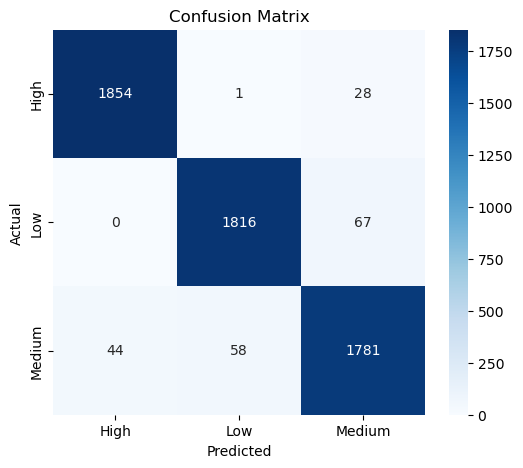

In [84]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)
labels = le.classes_

# Plot
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


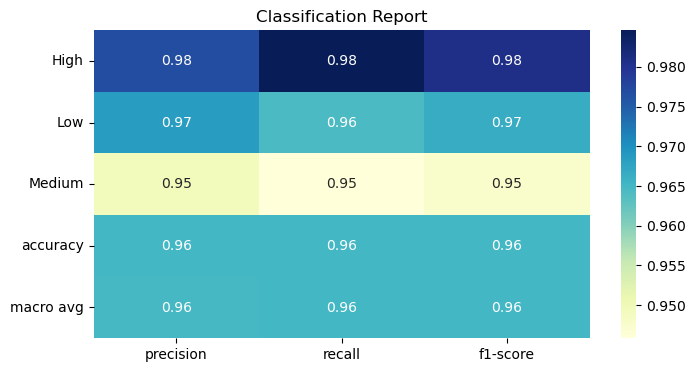

In [85]:
report = classification_report(y_test, y_pred_labels, output_dict=True)
df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 4))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap='YlGnBu')
plt.title("Classification Report")
plt.show()


In [86]:
df_report

,precision,recall,f1-score,support
High,0.976818,0.984599,0.980693,1883.00000
Low,0.968533,0.964418,0.966472,1883.00000
Medium,0.949360,0.945831,0.947592,1883.00000
accuracy,0.964950,0.964950,0.964950,0.96495
macro avg,0.964904,0.964950,0.964919,5649.00000
weighted avg,0.964904,0.964950,0.964919,5649.00000
